In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Thanks to https://stackoverflow.com/a/45560545

In [7]:
plt.rcParams['figure.figsize'] = [50, 50]

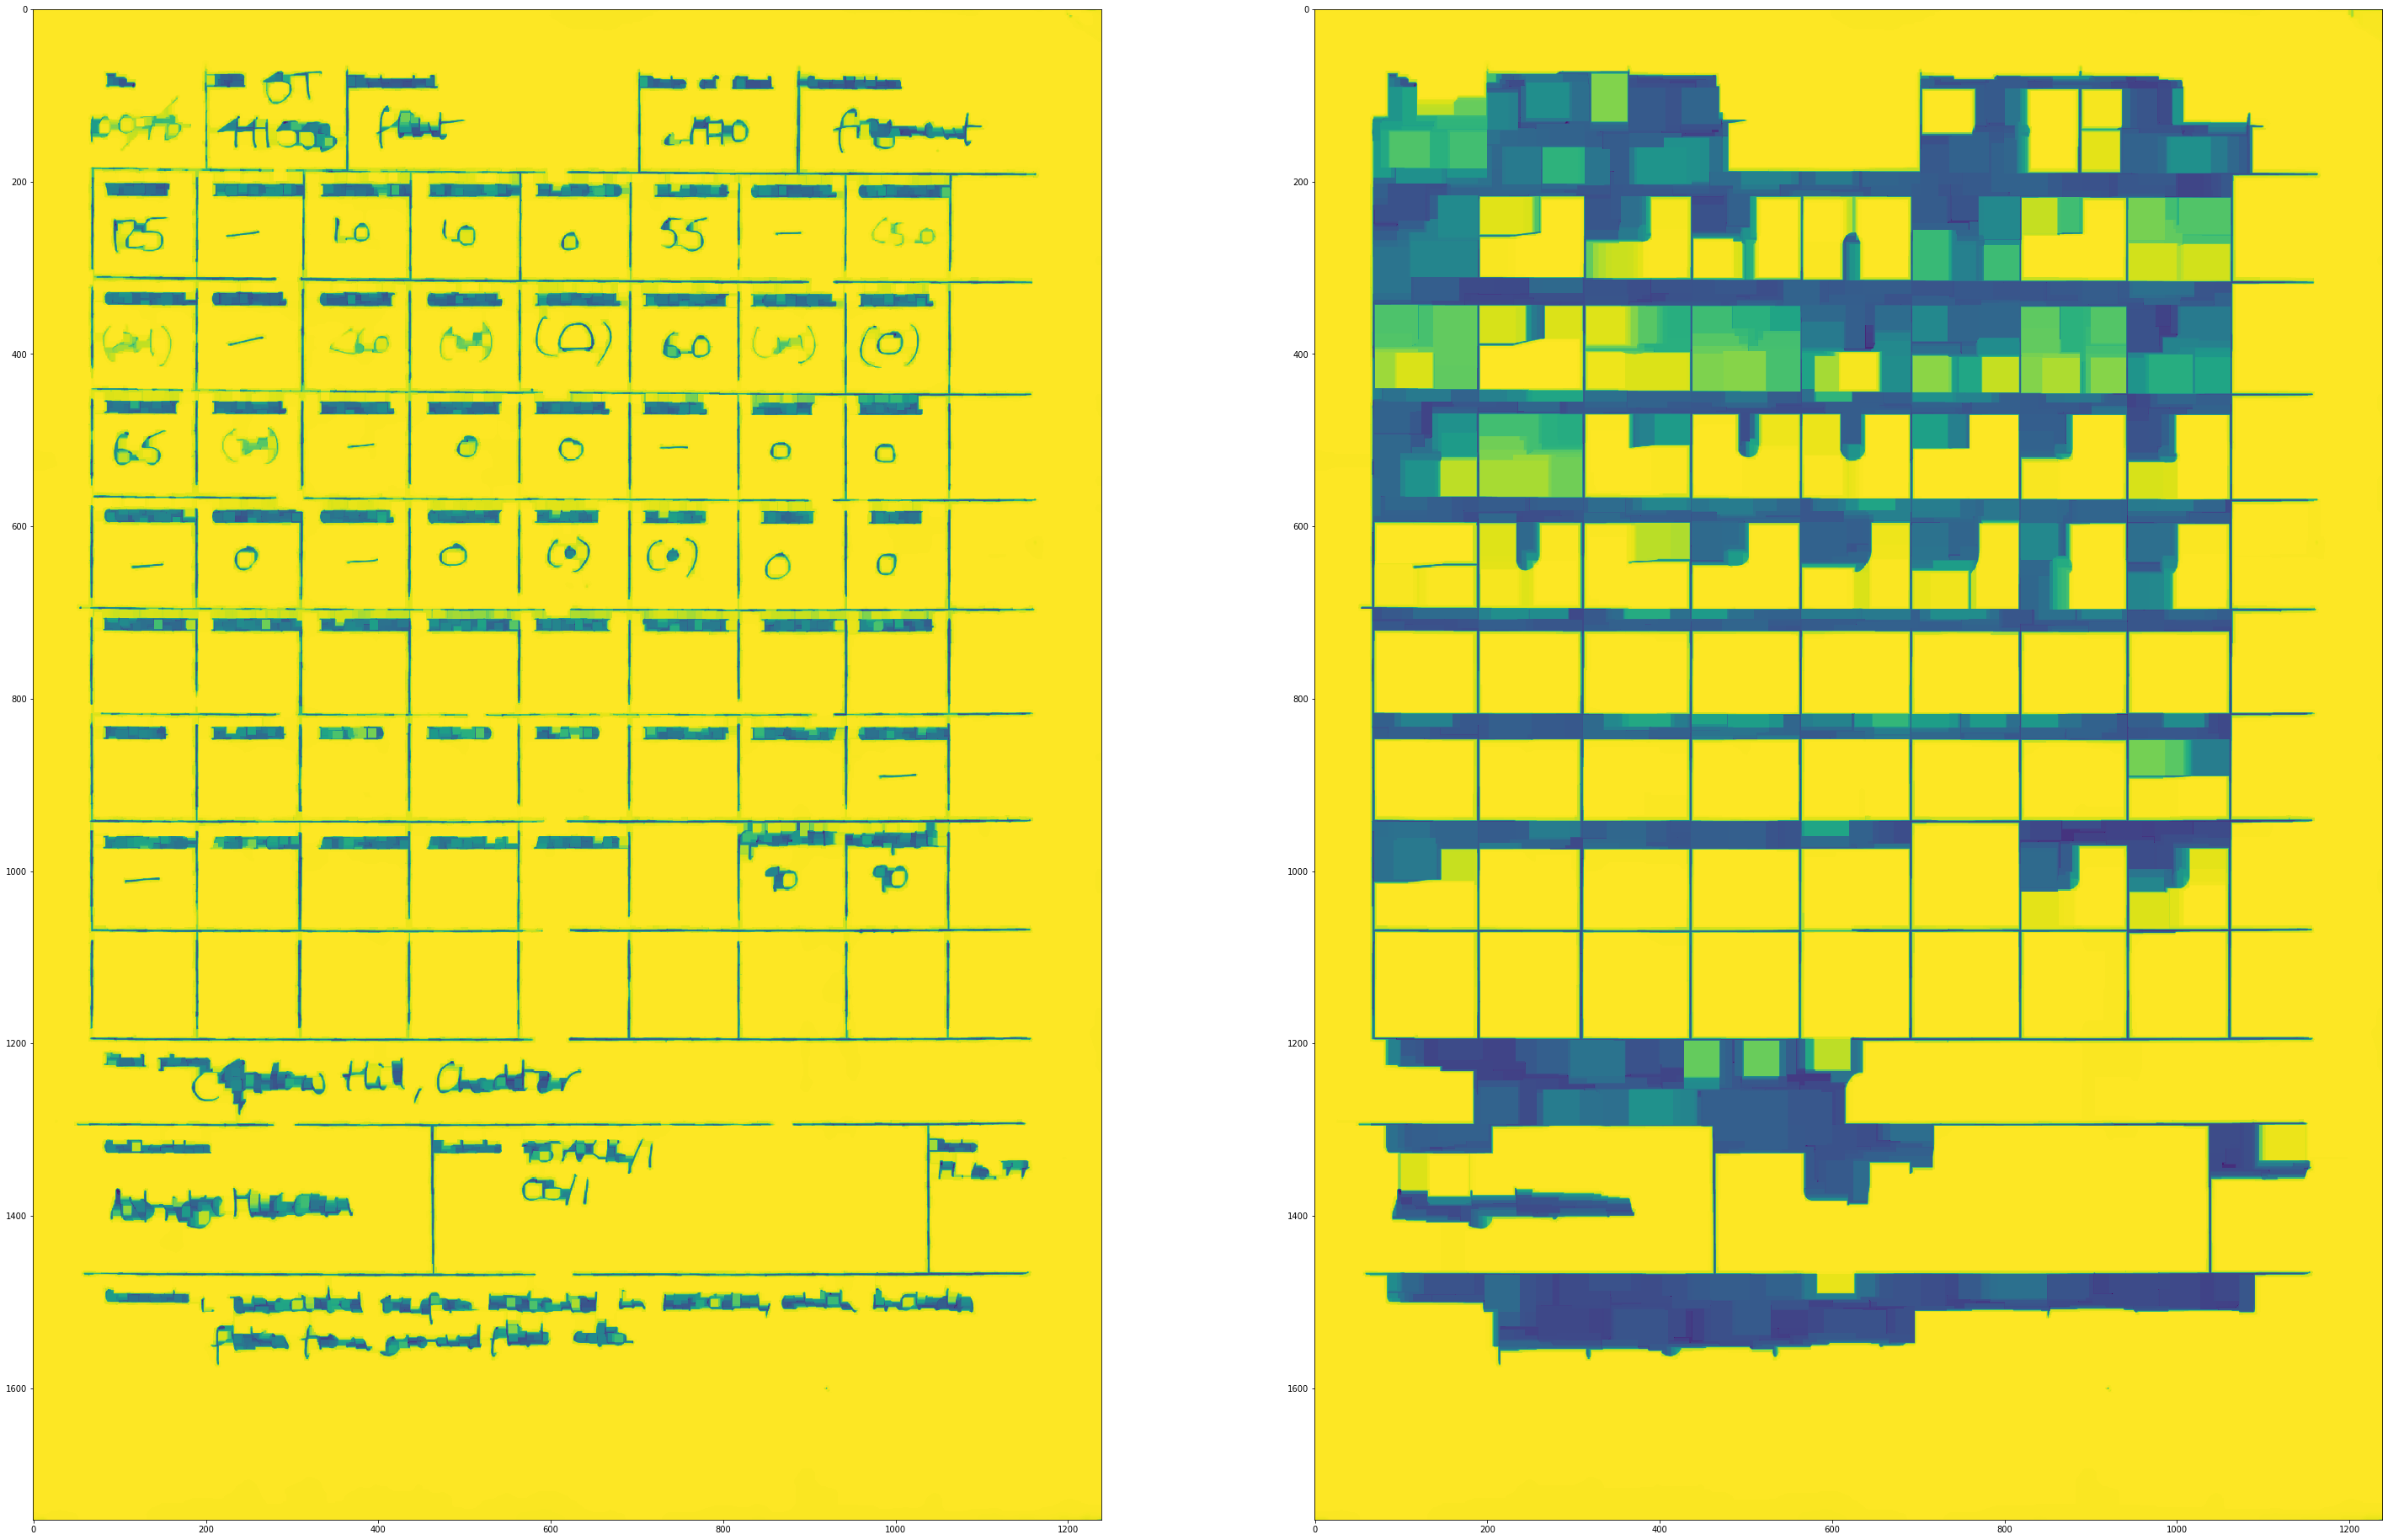

In [27]:
img = cv.imread("10078-form.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
denoised = cv.fastNlMeansDenoising(gray)

opened_kernel = np.ones((9,9),np.uint8)

opened = cv.morphologyEx(denoised, cv.MORPH_OPEN, opened_kernel)

kernel = np.ones((3,3),np.uint8)
its = 20

eroded = cv.erode(opened, kernel, iterations = its)
dilated = cv.dilate(eroded, kernel, iterations = its)

#ret,threshed = cv.threshold(dilated,0,255,cv.THRESH_TRUNC+cv.THRESH_OTSU)

plt.subplot(1, 2, 1)
plt.imshow(opened)
plt.subplot(1, 2, 2)
plt.imshow(dilated)

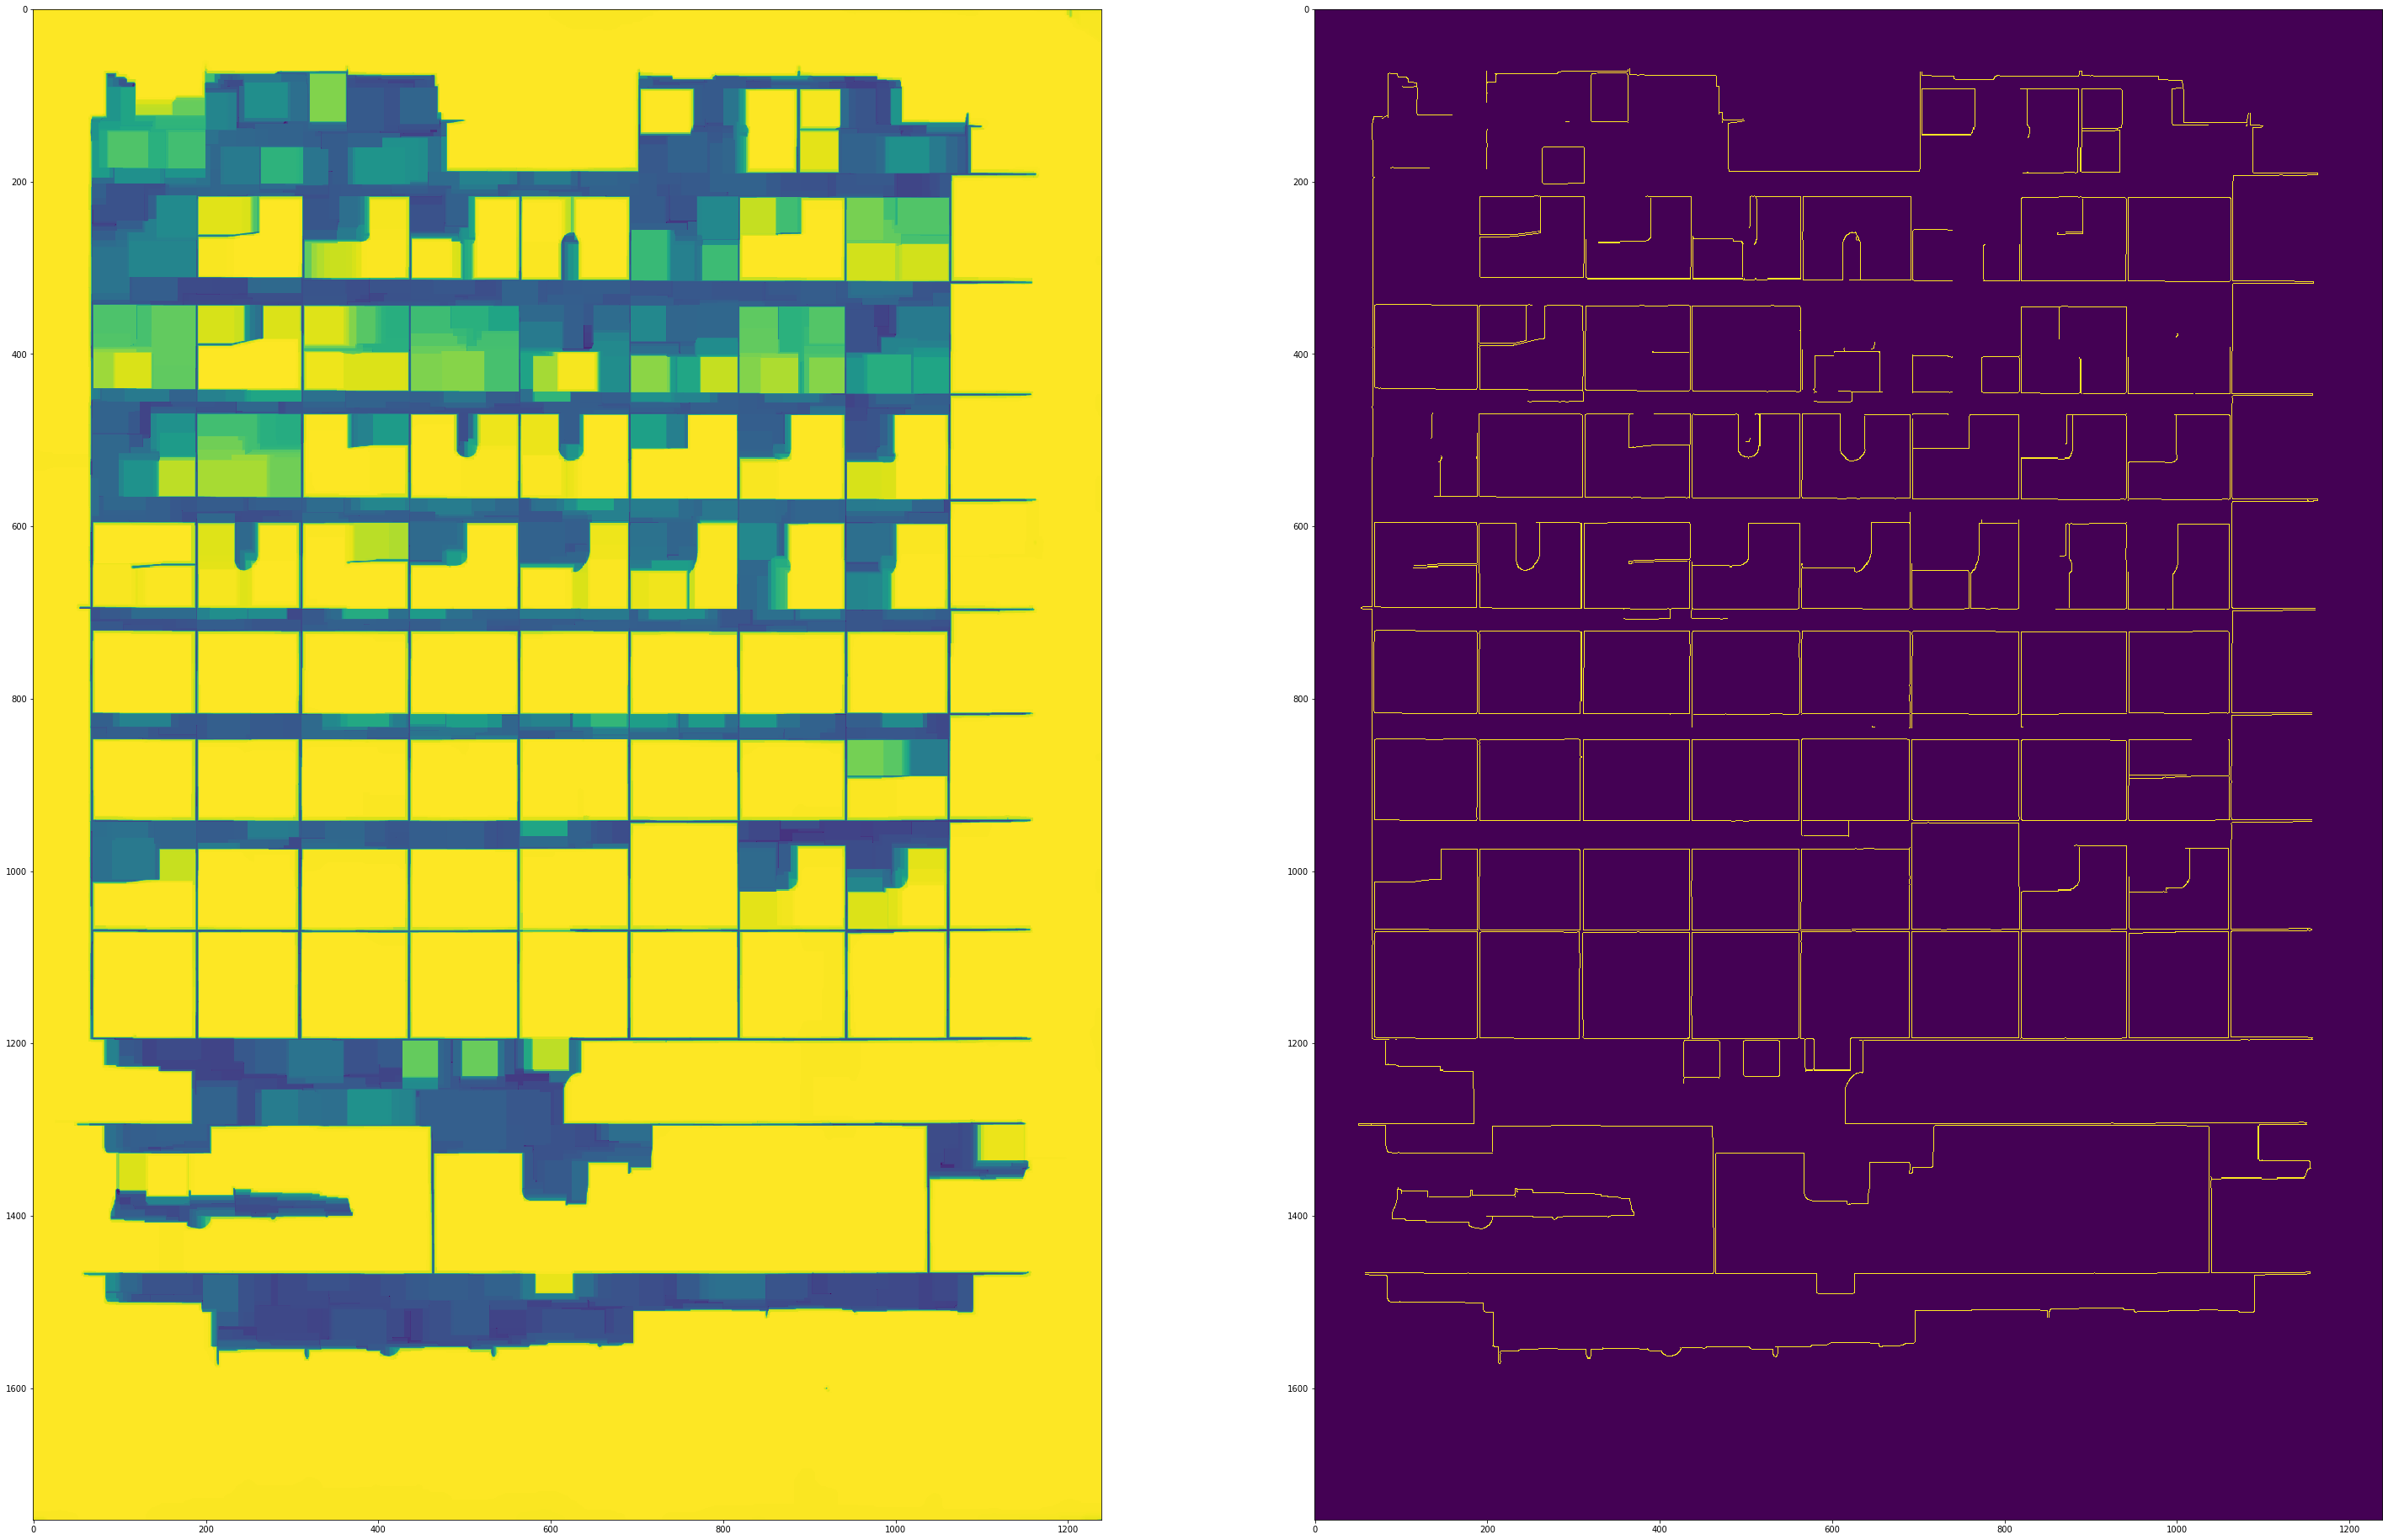

In [28]:
low_threshold = 200
high_threshold = 300
edges = cv.Canny(dilated.copy(), low_threshold, high_threshold)


plt.subplot(1, 2, 1)
plt.imshow(dilated)
plt.subplot(1, 2, 2)
plt.imshow(edges)

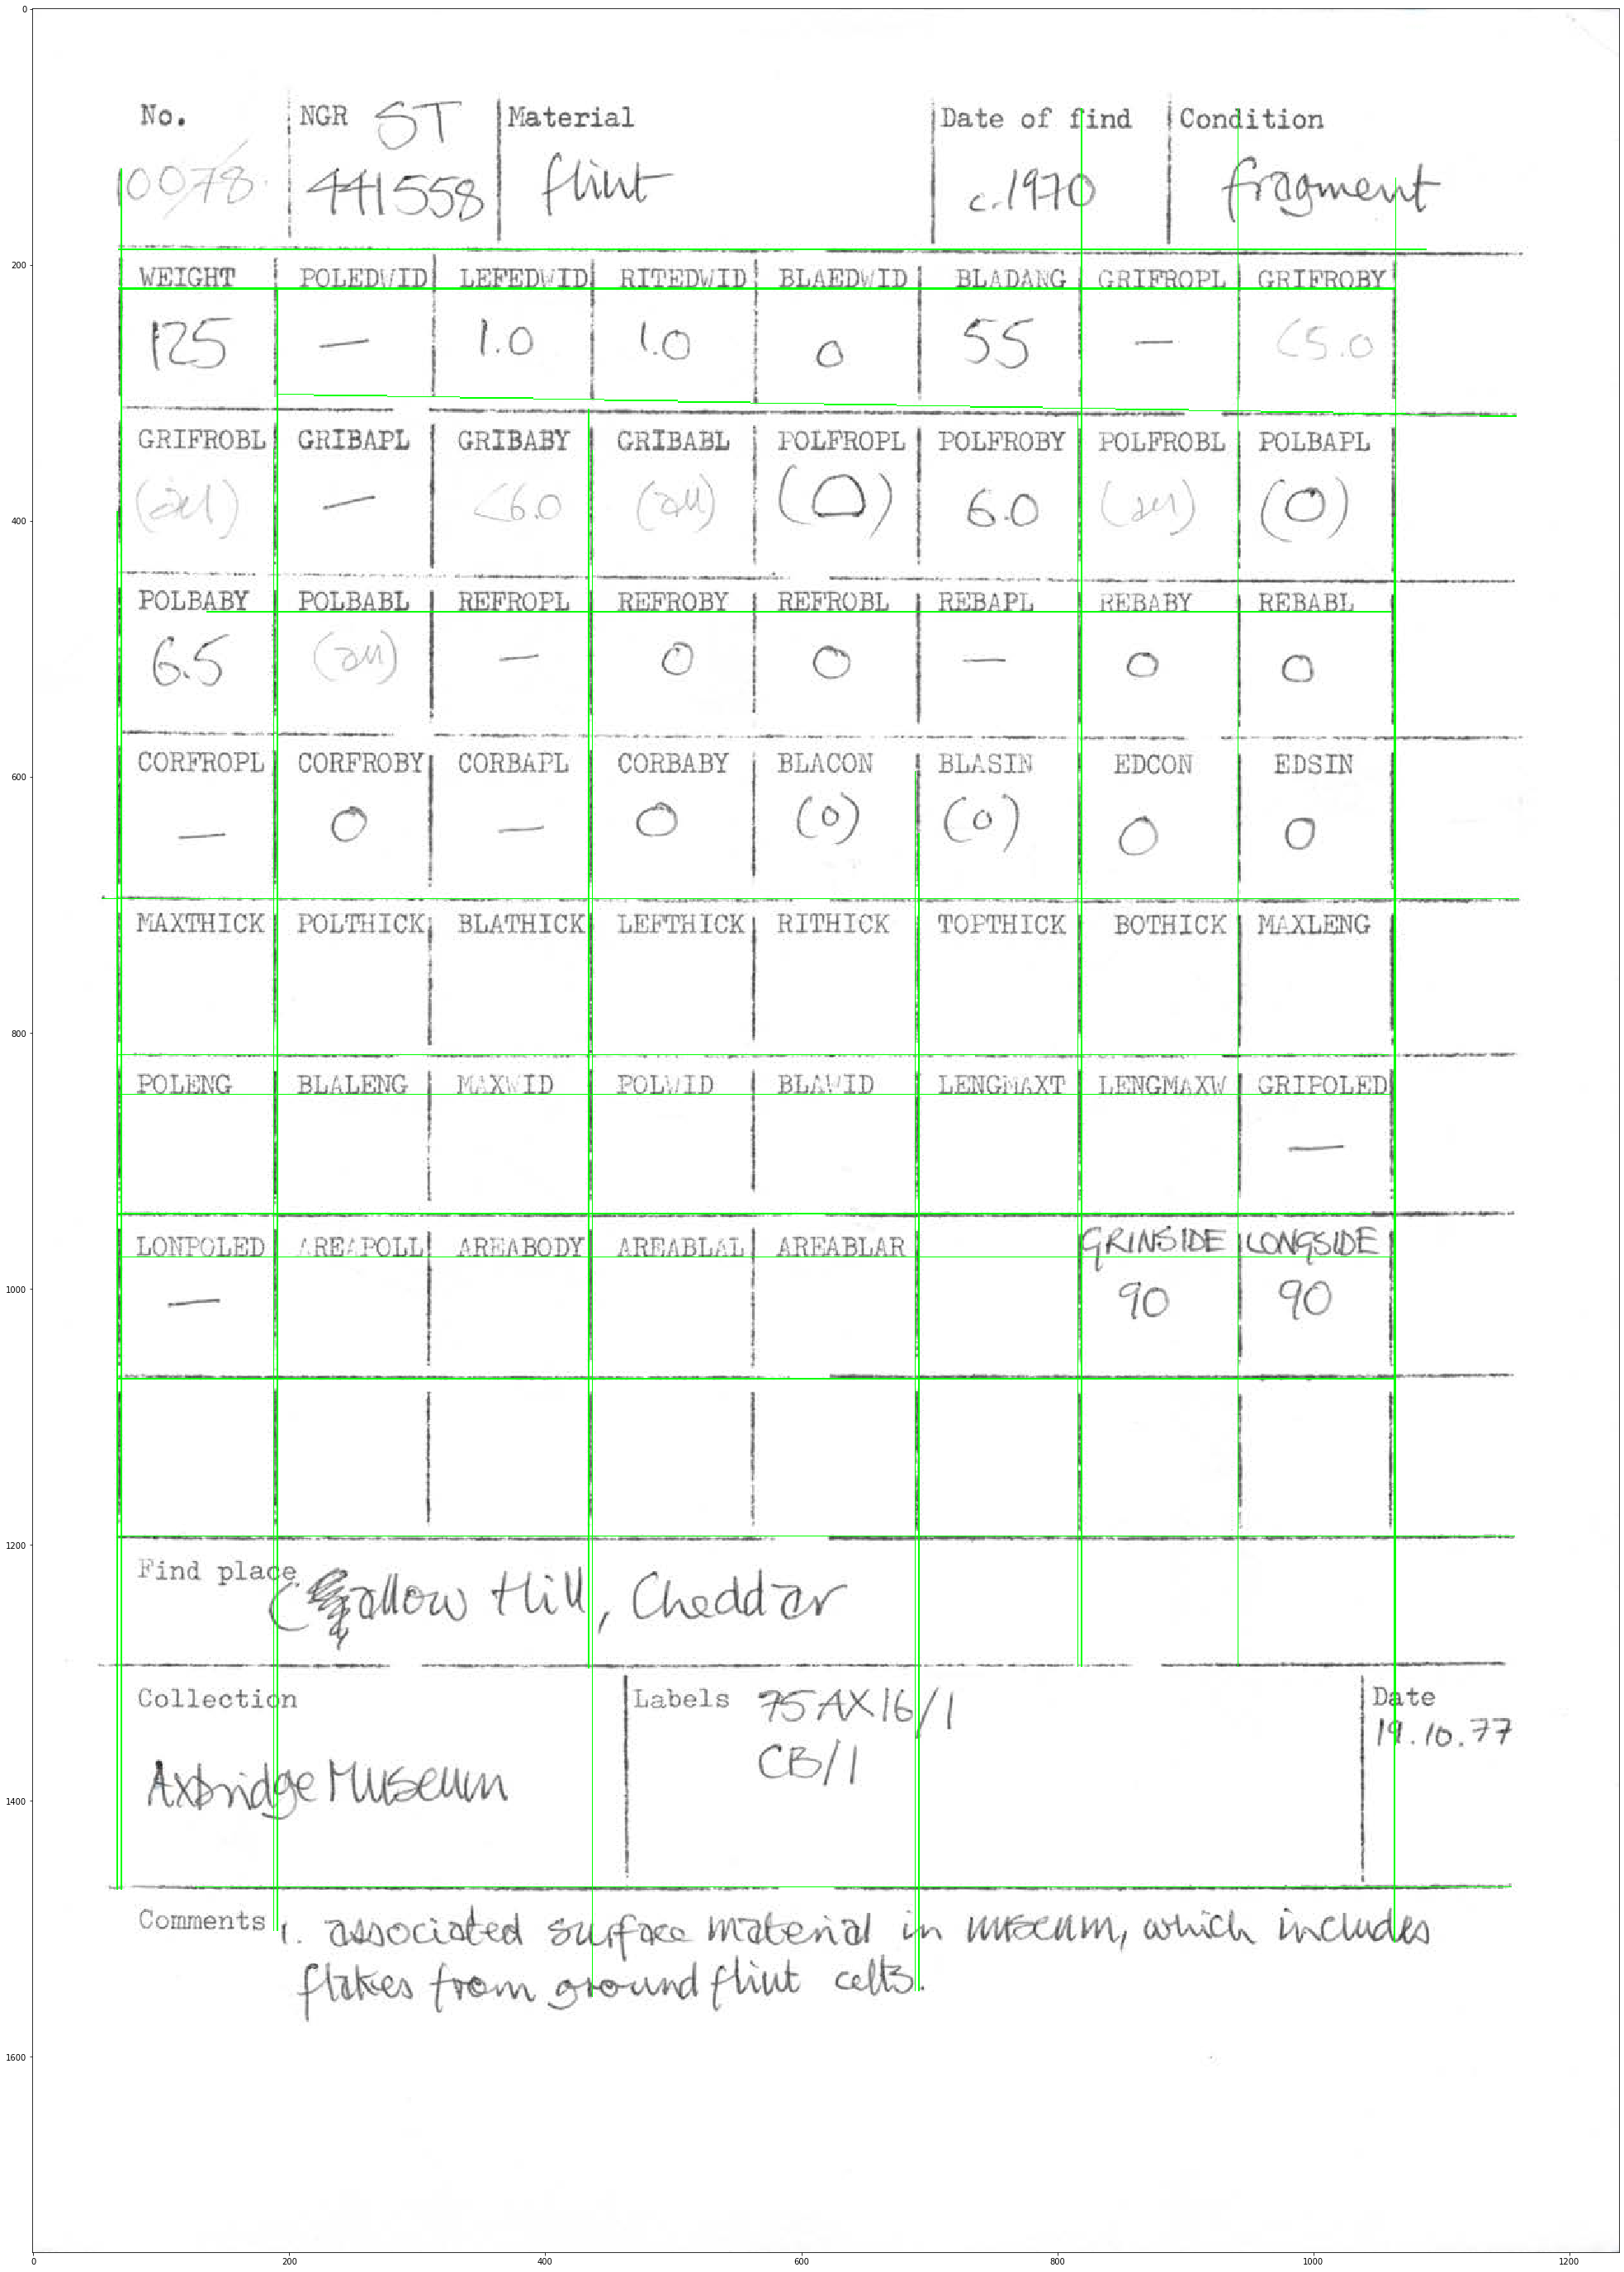

In [31]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = (np.pi / 180) # angular resolution in radians of the Hough grid
threshold = 10  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 900  # minimum number of pixels making up a line
max_line_gap = 200  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) #* 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv.HoughLinesP(edges, rho, theta, threshold, np.array([]), 
                        min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv.line(line_image,(x1,y1),(x2,y2),(0,255,0),1)
plt.imshow(line_image)

In [12]:
lines

array([[[  67, 1068, 1049, 1068]],

       [[  66,  941, 1044,  941]],

       [[  80, 1070, 1054, 1070]],

       [[  51, 1293, 1150, 1293]],

       [[  95, 1196, 1072, 1196]],

       [[ 819, 1193,  819,   78]],

       [[ 113,  819, 1109,  819]],

       [[ 188, 1469,  188,  196]],

       [[  54,  696, 1140,  696]],

       [[ 941, 1193,  941,   78]],

       [[ 126, 1467, 1020, 1467]],

       [[ 816, 1193,  816,  315]],

       [[  66, 1195,   66,  393]],

       [[  69, 1195,   69,  129]],

       [[ 437, 1194,  437,  316]],

       [[ 118, 1194,  989, 1194]],

       [[  68,  722, 1064,  722]],

       [[  79,  817, 1082,  817]],

       [[ 943, 1112,  943,   78]],

       [[ 690, 1151,  690,  314]],

       [[ 190, 1414,  190,  195]],

       [[1061, 1347, 1061,  140]],

       [[ 189,  218, 1064,  218]],

       [[ 208,  456, 1026,  456]],

       [[ 564, 1296,  564,  444]],

       [[ 562, 1081,  562,  188]],

       [[  87,  596,  904,  596]],

       [[ 310, 1253,  310,  